In [46]:
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import json

In [82]:
csv_file = "EdStat_UK_Spain.csv"
education_data = pd.read_csv(csv_file)
education_data.head()

,Country Name,Country Code,Indicator Name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,United Kingdom,GBR,Population of the official age for secondary e...,5281251.0,5371033.0,5428790.0,5459665.0,5466397.0,5450755.0,5474232.0,5477854.0,5464484.0,5434493.0,5385484.0
1,United Kingdom,GBR,Population of the official age for secondary e...,2580514.0,2621106.0,2645591.0,2656926.0,2657262.0,2648123.0,2668074.0,2677290.0,2675829.0,2663199.0,2638065.0
2,United Kingdom,GBR,Population of the official age for secondary e...,2700737.0,2749927.0,2783199.0,2802739.0,2809135.0,2802632.0,2806158.0,2800564.0,2788655.0,2771294.0,2747419.0
3,United Kingdom,GBR,Population of the official age for tertiary ed...,3485742.0,3579271.0,3684921.0,3785901.0,3877123.0,3951026.0,4028533.0,4095885.0,4153190.0,4197265.0,4225219.0
4,United Kingdom,GBR,Population of the official age for tertiary ed...,1730684.0,1771079.0,1817199.0,1861146.0,1900267.0,1930730.0,1969999.0,2004477.0,2034937.0,2060122.0,2079167.0


In [83]:
education_data

,Country Name,Country Code,Indicator Name,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,United Kingdom,GBR,Population of the official age for secondary e...,5.281251e+06,5.371033e+06,5.428790e+06,5.459665e+06,5.466397e+06,5.450755e+06,5.474232e+06,5.477854e+06,5.464484e+06,5.434493e+06,5.385484e+06
1,United Kingdom,GBR,Population of the official age for secondary e...,2.580514e+06,2.621106e+06,2.645591e+06,2.656926e+06,2.657262e+06,2.648123e+06,2.668074e+06,2.677290e+06,2.675829e+06,2.663199e+06,2.638065e+06
2,United Kingdom,GBR,Population of the official age for secondary e...,2.700737e+06,2.749927e+06,2.783199e+06,2.802739e+06,2.809135e+06,2.802632e+06,2.806158e+06,2.800564e+06,2.788655e+06,2.771294e+06,2.747419e+06
3,United Kingdom,GBR,Population of the official age for tertiary ed...,3.485742e+06,3.579271e+06,3.684921e+06,3.785901e+06,3.877123e+06,3.951026e+06,4.028533e+06,4.095885e+06,4.153190e+06,4.197265e+06,4.225219e+06
4,United Kingdom,GBR,Population of the official age for tertiary ed...,1.730684e+06,1.771079e+06,1.817199e+06,1.861146e+06,1.900267e+06,1.930730e+06,1.969999e+06,2.004477e+06,2.034937e+06,2.060122e+06,2.079167e+06
5,United Kingdom,GBR,Population of the official age for tertiary ed...,1.755058e+06,1.808192e+06,1.867722e+06,1.924755e+06,1.976856e+06,2.020296e+06,2.058534e+06,2.091408e+06,2.118253e+06,2.137143e+06,2.146052e+06
6,United Kingdom,GBR,Population growth (annual %),3.849760e-01,4.233371e-01,4.656411e-01,5.689431e-01,6.866113e-01,7.350487e-01,7.786661e-01,7.870326e-01,7.563909e-01,7.838886e-01,7.816773e-01
7,Spain,ESP,Population of the official age for secondary e...,2.847214e+06,2.776477e+06,2.719937e+06,2.674847e+06,2.644654e+06,2.629714e+06,2.621290e+06,2.608463e+06,2.588814e+06,2.560624e+06,2.525829e+06
8,Spain,ESP,Population of the official age for secondary e...,1.381294e+06,1.347284e+06,1.320000e+06,1.298216e+06,1.283776e+06,1.277042e+06,1.273218e+06,1.266914e+06,1.257272e+06,1.243946e+06,1.228149e+06
9,Spain,ESP,Population of the official age for secondary e...,1.465920e+06,1.429193e+06,1.399937e+06,1.376631e+06,1.360878e+06,1.352672e+06,1.348072e+06,1.341549e+06,1.331542e+06,1.316678e+06,1.297680e+06


In [84]:
len(education_data["Indicator Name"].unique())

7

In [85]:
list(education_data.columns[3:])

['2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011']

In [86]:
x=list(map(int,list(education_data.columns[3:])))

In [87]:
x

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

In [88]:
y1=list(education_data.iloc[0].values)[3:]
y1

[5281251.0,
 5371033.0,
 5428790.0,
 5459665.0,
 5466397.0,
 5450755.0,
 5474232.0,
 5477854.0,
 5464484.0,
 5434493.0,
 5385484.0]

In [89]:
Title=education_data.iloc[0].values[2]

In [90]:
y2=list(education_data.iloc[7].values)[3:]
y2

[2847214.0,
 2776477.0,
 2719937.0,
 2674847.0,
 2644654.0,
 2629714.0,
 2621290.0,
 2608463.0,
 2588814.0,
 2560624.0,
 2525829.0]

In [91]:
education_data.iloc[0].values[2]

'Population of the official age for secondary education, both sexes (number)'

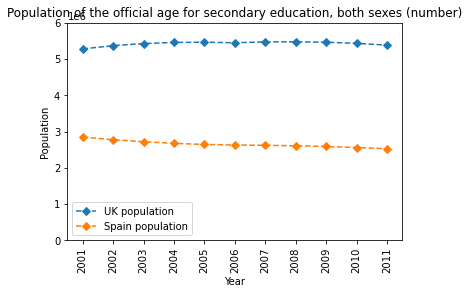

In [92]:
plt.plot(x,y1, linestyle= 'dashed', marker= 'D',label="UK population")
plt.plot(x,y2, linestyle= 'dashed', marker= 'D',label="Spain population")
plt.title(Title)
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(x,rotation=90)
plt.legend()
plt.ylim(0,6000000)
plt.yticks([0, 1000000,2000000,3000000, 4000000, 5000000, 6000000])
plt.show()

In [93]:
y3=list(education_data.iloc[1].values)[3:]
y3

[2580514.0,
 2621106.0,
 2645591.0,
 2656926.0,
 2657262.0,
 2648123.0,
 2668074.0,
 2677290.0,
 2675829.0,
 2663199.0,
 2638065.0]

In [94]:
y4=list(education_data.iloc[8].values)[3:]
y4

[1381294.0,
 1347284.0,
 1320000.0,
 1298216.0,
 1283776.0,
 1277042.0,
 1273218.0,
 1266914.0,
 1257272.0,
 1243946.0,
 1228149.0]

In [95]:
Title1=education_data.iloc[1].values[2]

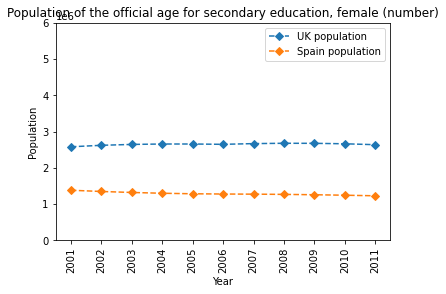

In [96]:
plt.plot(x,y3, linestyle= 'dashed', marker= 'D',label="UK population")
plt.plot(x,y4, linestyle= 'dashed', marker= 'D',label="Spain population")
plt.title(Title1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(x,rotation=90)
plt.legend()
plt.ylim(0,6000000)
plt.yticks([0, 1000000,2000000,3000000, 4000000, 5000000, 6000000])
plt.show()

In [97]:
y5=list(education_data.iloc[2].values)[3:]
y5

[2700737.0,
 2749927.0,
 2783199.0,
 2802739.0,
 2809135.0,
 2802632.0,
 2806158.0,
 2800564.0,
 2788655.0,
 2771294.0,
 2747419.0]

In [98]:
y6=list(education_data.iloc[9].values)[3:]
y6

[1465920.0,
 1429193.0,
 1399937.0,
 1376631.0,
 1360878.0,
 1352672.0,
 1348072.0,
 1341549.0,
 1331542.0,
 1316678.0,
 1297680.0]

In [99]:
Title2=education_data.iloc[2].values[2]

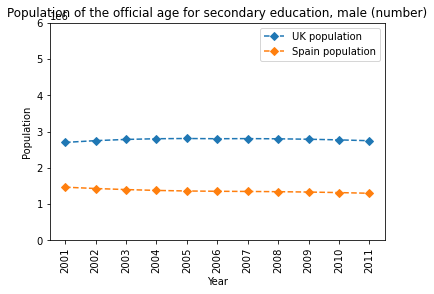

In [100]:
plt.plot(x,y5, linestyle= 'dashed', marker= 'D',label="UK population")
plt.plot(x,y6, linestyle= 'dashed', marker= 'D',label="Spain population")
plt.title(Title2)
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(x,rotation=90)
plt.legend()
plt.ylim(0,6000000)
plt.yticks([0, 1000000,2000000,3000000, 4000000, 5000000, 6000000])
plt.show()

In [101]:
y7=list(education_data.iloc[3].values)[3:]
y7

[3485742.0,
 3579271.0,
 3684921.0,
 3785901.0,
 3877123.0,
 3951026.0,
 4028533.0,
 4095885.0,
 4153190.0,
 4197265.0,
 4225219.0]

In [102]:
y8=list(education_data.iloc[10].values)[3:]
y8

[3062531.0,
 2971069.0,
 2872113.0,
 2778176.0,
 2688434.0,
 2604760.0,
 2550048.0,
 2496864.0,
 2442525.0,
 2388415.0,
 2338119.0]

In [103]:
Title3=education_data.iloc[3].values[2]

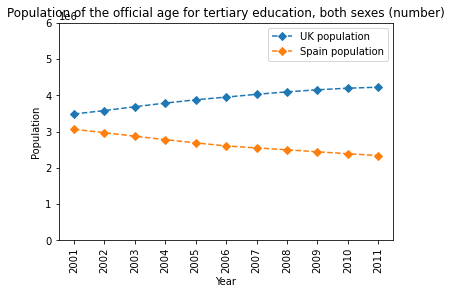

In [104]:
plt.plot(x,y7, linestyle= 'dashed', marker= 'D',label="UK population")
plt.plot(x,y8, linestyle= 'dashed', marker= 'D',label="Spain population")
plt.title(Title3)
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(x,rotation=90)
plt.legend()
plt.ylim(0,6000000)
plt.yticks([0, 1000000,2000000,3000000, 4000000, 5000000, 6000000])
plt.show()

In [105]:
y9=list(education_data.iloc[4].values)[3:]
y9

[1730684.0,
 1771079.0,
 1817199.0,
 1861146.0,
 1900267.0,
 1930730.0,
 1969999.0,
 2004477.0,
 2034937.0,
 2060122.0,
 2079167.0]

In [106]:
y10=list(education_data.iloc[11].values)[3:]
y10

[1489870.0,
 1444683.0,
 1396227.0,
 1350454.0,
 1306758.0,
 1265829.0,
 1238629.0,
 1212286.0,
 1185826.0,
 1160061.0,
 1136732.0]

In [107]:
Title4=education_data.iloc[4].values[2]

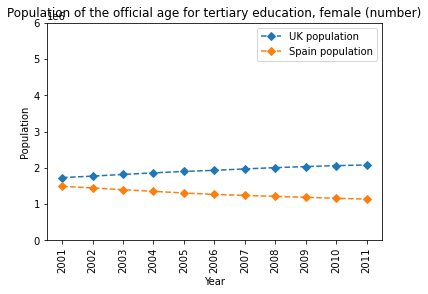

In [108]:
plt.plot(x,y9, linestyle= 'dashed', marker= 'D',label="UK population")
plt.plot(x,y10, linestyle= 'dashed', marker= 'D',label="Spain population")
plt.title(Title4)
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(x,rotation=90)
plt.legend()
plt.ylim(0,6000000)
plt.yticks([0, 1000000,2000000,3000000, 4000000, 5000000, 6000000])
plt.show()

In [109]:
y11=list(education_data.iloc[5].values)[3:]
y11

[1755058.0,
 1808192.0,
 1867722.0,
 1924755.0,
 1976856.0,
 2020296.0,
 2058534.0,
 2091408.0,
 2118253.0,
 2137143.0,
 2146052.0]

In [110]:
y12=list(education_data.iloc[12].values)[3:]
y12

[1572661.0,
 1526386.0,
 1475886.0,
 1427722.0,
 1381676.0,
 1338931.0,
 1311419.0,
 1284578.0,
 1256699.0,
 1228354.0,
 1201387.0]

In [111]:
Title5=education_data.iloc[5].values[2]

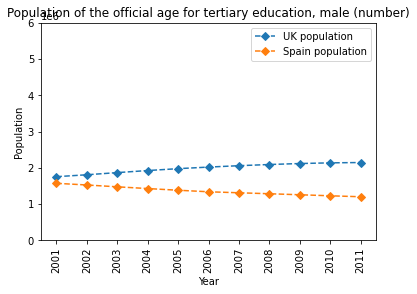

In [112]:
plt.plot(x,y11, linestyle= 'dashed', marker= 'D',label="UK population")
plt.plot(x,y12, linestyle= 'dashed', marker= 'D',label="Spain population")
plt.title(Title5)
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(x,rotation=90)
plt.legend()
plt.ylim(0,6000000)
plt.yticks([0, 1000000,2000000,3000000, 4000000, 5000000, 6000000])
plt.show()